In [1]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

# Results vindkraft  project (KLIV)

Here the most important results and figures are shown. They might be used for an article or for the final project report.
The following is shown in this notebook:

#### TOC
1. Low Power Periods (LPP)<br>
2. Full Load Hours (FLH)<br>
3. Weather Regimes<br>
    3.1 demonstration of weather regimes<br>
    3.2 change of weather regimes in a warmer climate
    

In [2]:
from lib.init import *
import lib.helpers as h
#from get_indicators import get_ind
GAMSregions = h.get_GAMSregions()
plt.close('all')
plt.ion()

### Wind power time series


(1, 10, 8760)
#class  #region  #timesteps


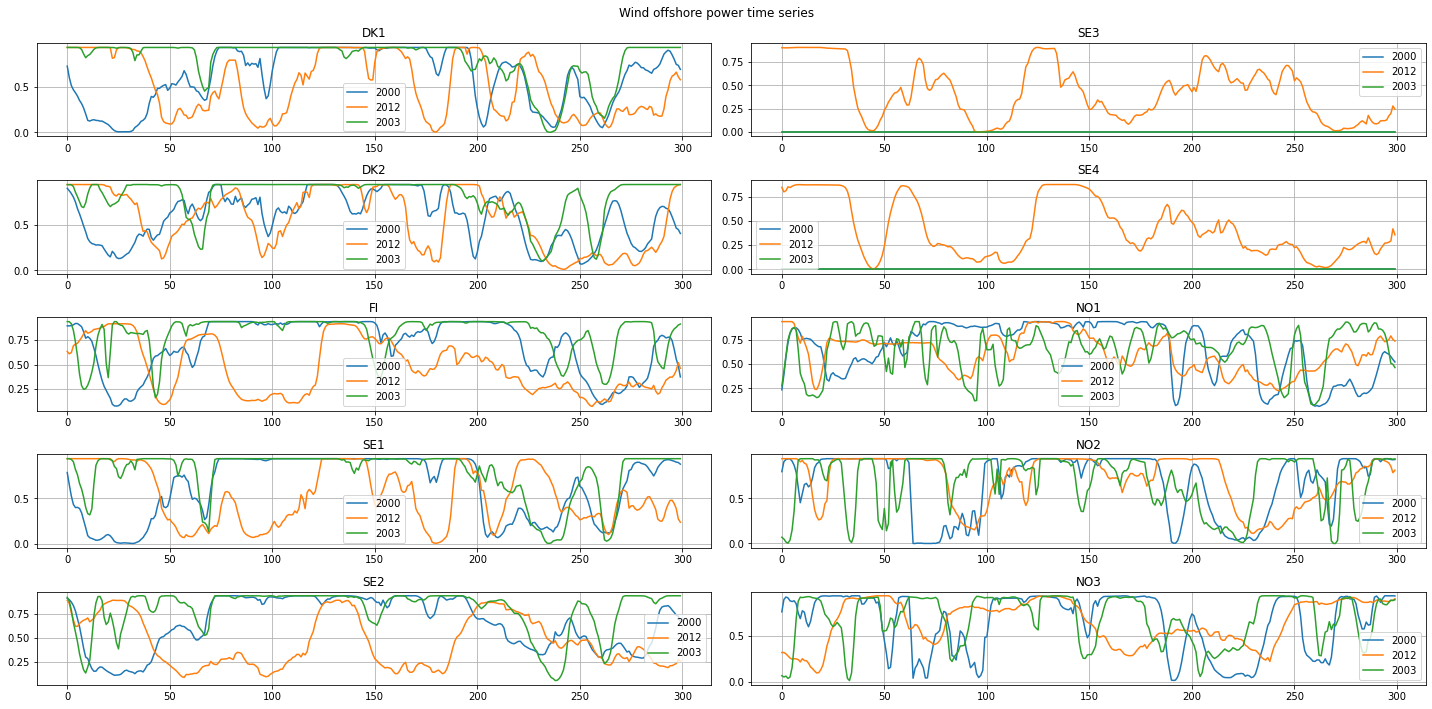

In [3]:
datainfo = {
    "region"      : "scand_gams", #"Europe13"
    "year"        : "2003",
    "model"       : "ERA5",     #"CORDEX_ictp_EC-EARTH"  #"HCLIM_EC-EARTH"
    "scenario"    : "historical",                #rcp85
    "modelyear"   : "",
    "SP"          : "200",}

years = [2000,2012,2003]
#years = np.arange(1999,2007)
wttype = "CFtime_windoffshore" # Choices: onshore: "CFtime_windonshoreA" and offshore: "CFtime_windoffshore"
fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("Wind offshore power time series") 

for y in years:
    datainfo['year'] = y
    f        = "GISdata_{}wind{}_{}.pkl". \
            format(datainfo['SP'],datainfo['year'],datainfo['region'])
    obj = h.load_object(h.winddatapath + f)   
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        profile = obj[wttype][0,reg_i,:]
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[300:600])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].grid(True)
        ax[j,k].legend(list(years))
        j+=1

        if j==5:
            j=0
            k=1
    
fig.tight_layout()
fig.savefig(h.plotpath + "WOFF_timeseries.png", dpi =300)

print(obj[wttype].shape)
print("#class  #region  #timesteps")

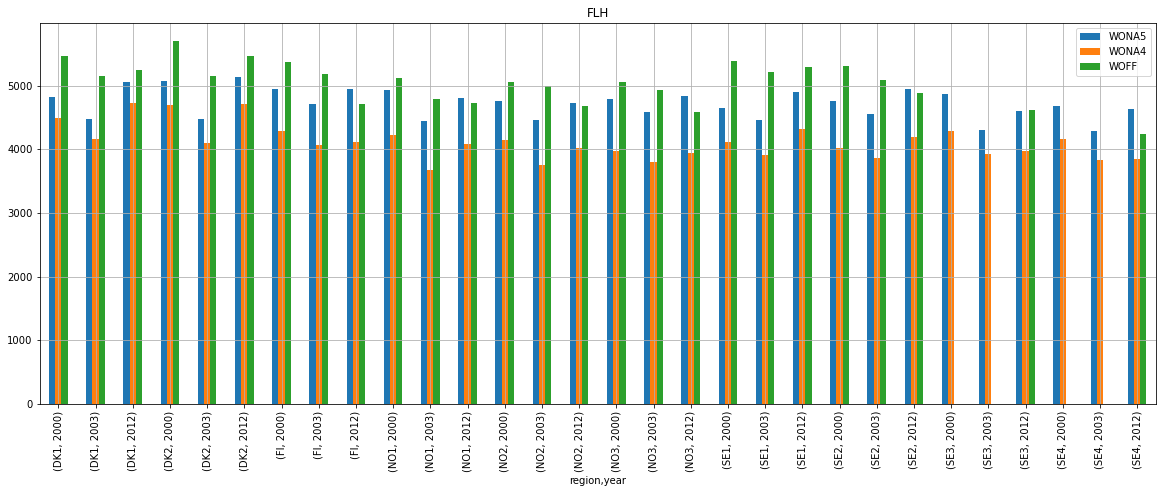

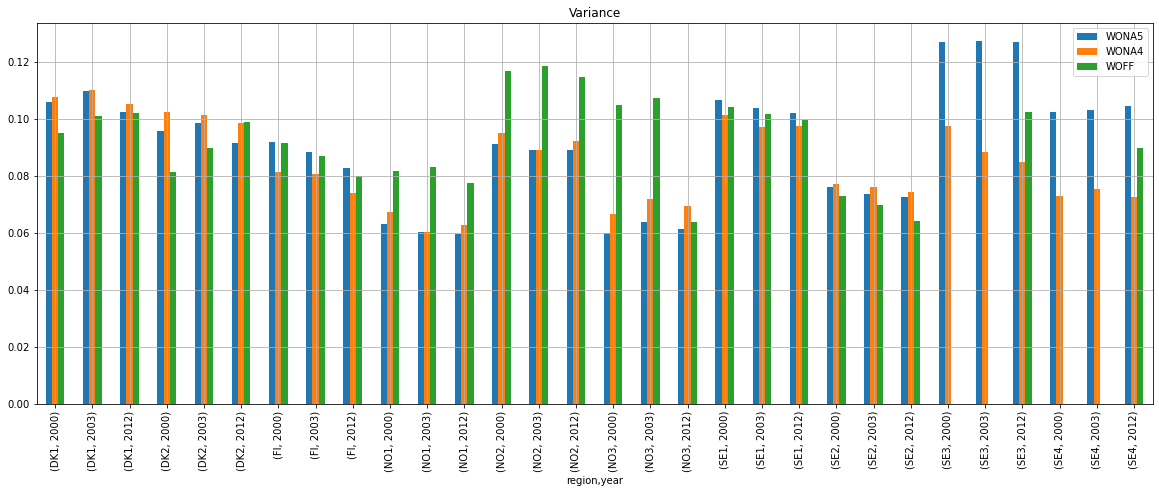

In [4]:
# Restructure power time series data into a pandas dataframe for statistical analyses
import pandas as pd

df = pd.DataFrame(columns = ['year','time','region','WONA'])
for y in years:
    fn        = "GISdata_200wind{}_scand_gams.pkl". \
            format(y)
    f = h.load_object(h.winddatapath + fn) 
    for ireg,reg in enumerate(GAMSregions.keys()):
        l      = f["CFtime_windonshoreA"].shape[-1]
        time   = pd.Series(range(l))
        year   = pd.Series(y,   index=range(l))
        region = pd.Series(reg, index=range(l))
        WONA5  = pd.Series(f["CFtime_windonshoreA"][4,ireg,:])
        WONA4  = pd.Series(f["CFtime_windonshoreA"][3,ireg,:])
        WOFF   = pd.Series(f["CFtime_windoffshore"][0,ireg,:])


        frame = {'year':year, 'time':time, 'region':region,
                'WONA5':WONA5, 'WONA4':WONA4, 'WOFF':WOFF}
        df_i = pd.DataFrame(frame)
        df = pd.concat([df, df_i],ignore_index=True)
df['WONA5'] = pd.to_numeric(df['WONA5'])
df['WONA4'] = pd.to_numeric(df['WONA4'])
df['WOFF']  = pd.to_numeric(df['WOFF'])

# regional stats per class
#print("regional and yearly mean: \n", df.groupby(['region', 'year'])['WONA5', 'WONA4', 'WOFF'].mean())
#print("regional and yearly variance: \n", df.groupby(['region', 'year'])['WONA5', 'WONA4', 'WOFF'].var())
fig,ax = plt.subplots(1,1, figsize=(20,7))
df.groupby(['region', 'year'])['WONA5', 'WONA4', 'WOFF'].sum().plot.bar(grid=True,title='FLH', ax=ax)
fig,ax = plt.subplots(1,1, figsize=(20,7))
df.groupby(['region', 'year'])['WONA5', 'WONA4', 'WOFF'].var().plot.bar(grid=True,title='Variance', ax=ax)
fig.savefig(h.plotpath + "wind_FLH_barplot.png", dpi =300)

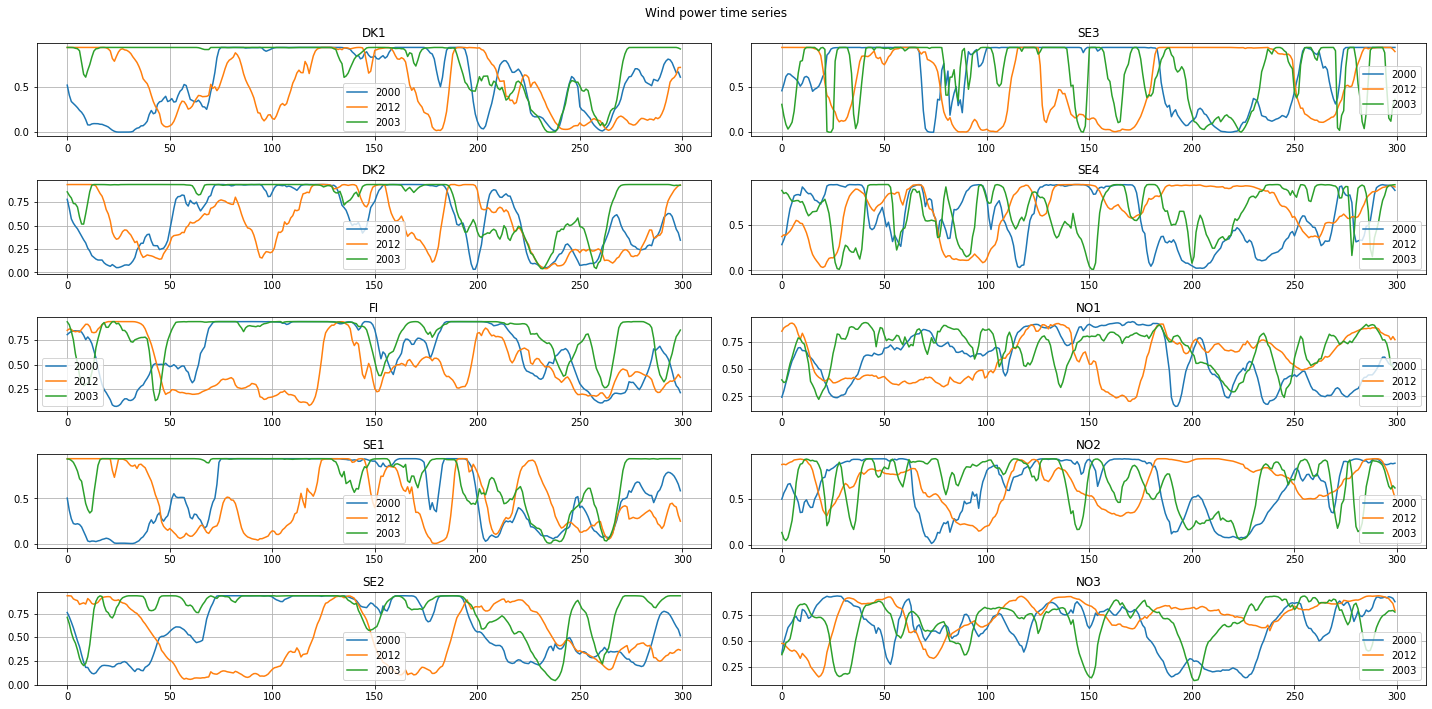

In [5]:
wttype = "CFtime_windonshoreA" # Choices: onshore: "CFtime_windonshoreA" and offshore: "CFtime_windoffshore"
fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("Wind power time series") 

for y in years:
    f        = "GISdata_200wind{}_scand_gams.pkl". \
            format(y)
    obj = h.load_object(h.winddatapath + f)   
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        profile = obj[wttype][-1,reg_i,:]
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[300:600])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].grid(True)
        ax[j,k].legend(list(years))
        j+=1

        if j==5:
            j=0
            k=1
fig.tight_layout()
fig.savefig(h.plotpath + "WON_timeseries.png", dpi =300)

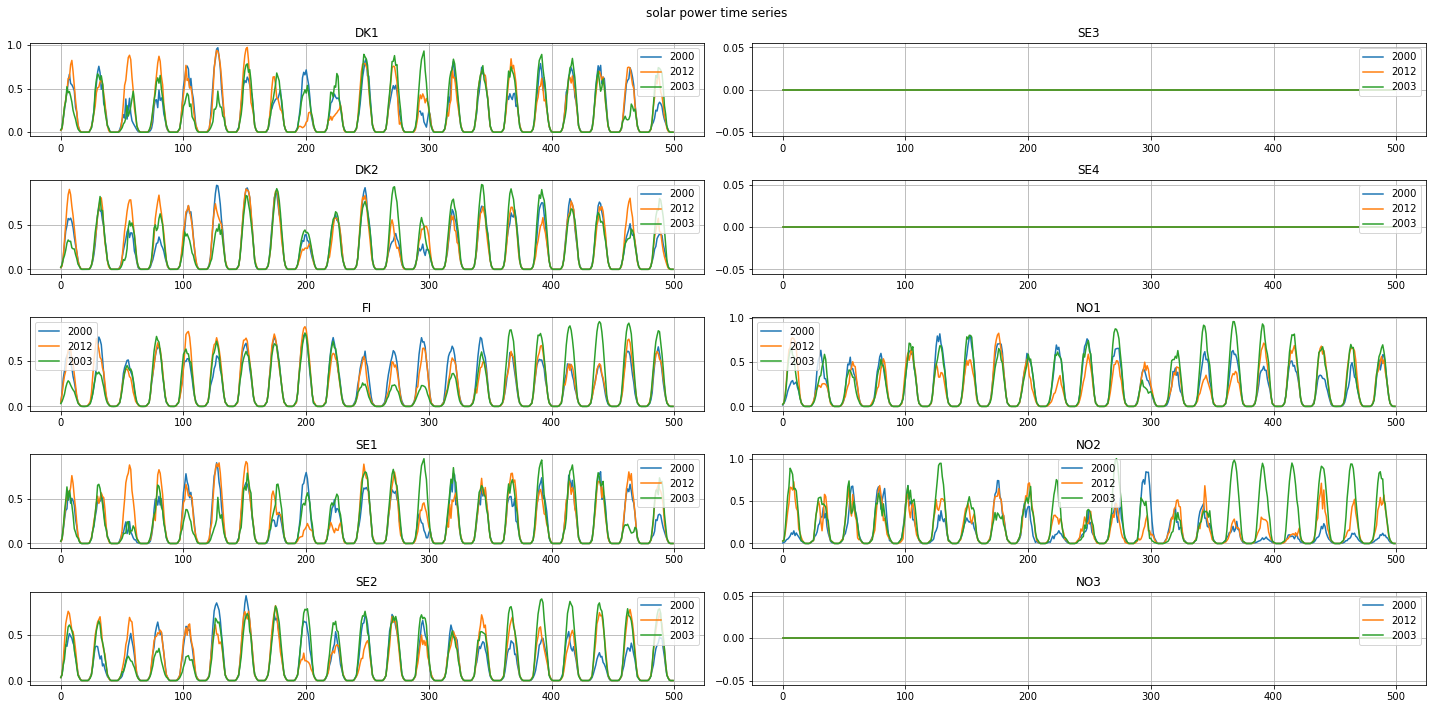

In [6]:
fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("solar power time series") 
re = "CFtime_pvrooftop"   # "CFtime_pvplantA" or "CFtime_pvrooftop" 
for y in years:
    datainfo['year'] = y
    f        = "GISdata_solar{}_{}.pkl". \
            format(datainfo['year'],datainfo['region'])
    obj = h.load_object(h.solardatapath + f)   
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        profile = obj[re][-1,reg_i,:]
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[4300:4800])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].grid(True)
        ax[j,k].legend(list(years))
        j+=1

        if j==5:
            j=0
            k=1
fig.tight_layout()

fig.savefig(h.plotpath + "{}.png".format(re), dpi =300)

In [7]:
# Restructure power time series data into a pandas dataframe for statistical analyses

import pandas as pd

df = pd.DataFrame(columns = ['year','time','region','PVPA'])
for y in years:
    fn        = "GISdata_solar{}_scand_gams.pkl". \
            format(y)
    f = h.load_object(h.solardatapath + fn) 

    for ireg,reg in enumerate(GAMSregions.keys()):
        l      = f["CFtime_pvplantA"].shape[-1]
        time   = pd.Series(range(l))
        year   = pd.Series(y,   index=range(l))
        region = pd.Series(reg, index=range(l))
        PVPA   = pd.Series(f["CFtime_pvplantA"][0,ireg,:])


        frame = {'year':year, 'time':time, 'region':region,
                'PVPA':PVPA}
        df_i = pd.DataFrame(frame)
        df = pd.concat([df, df_i],ignore_index=True)
df['PVPA'] = pd.to_numeric(df['PVPA'])

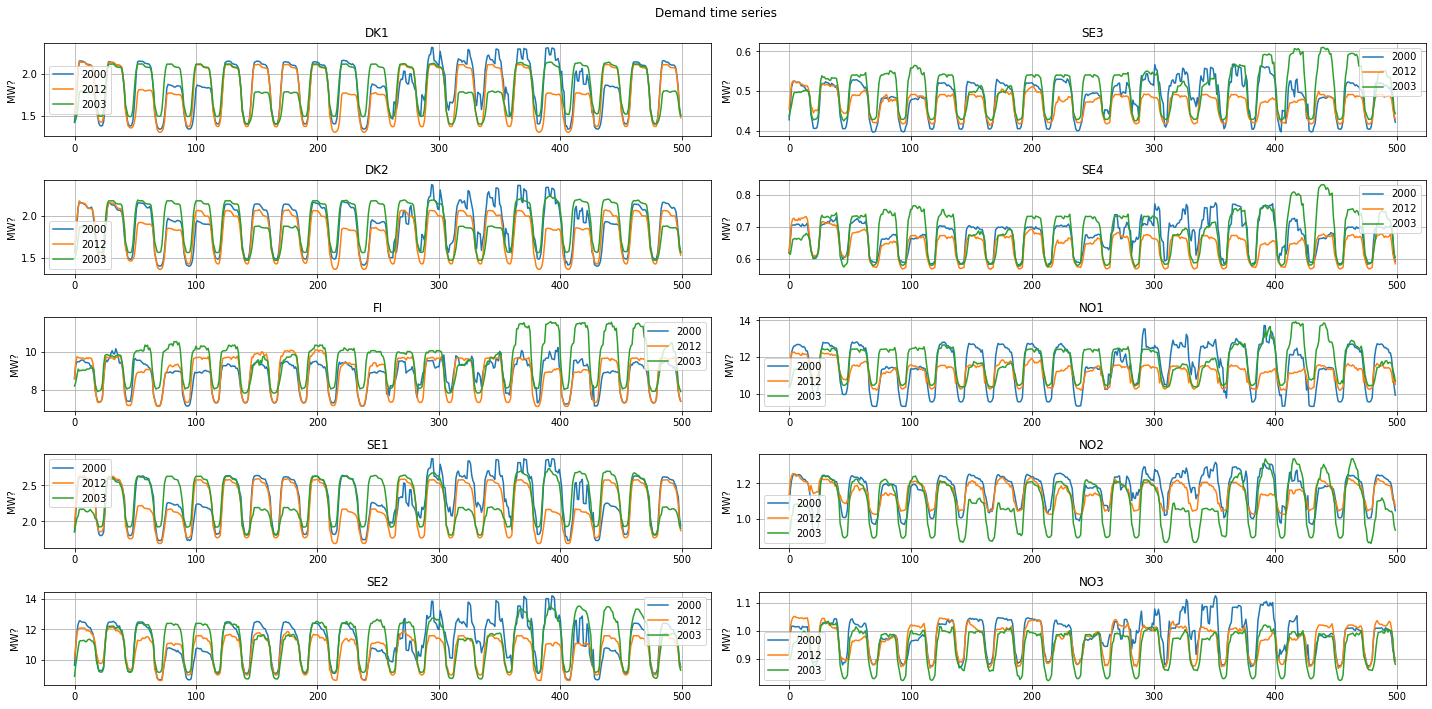

In [8]:
fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("Demand time series") 
re = "profile"
for y in years:
    datainfo['year'] = y
    f        = "SyntheticDemand_scand_gams_ssp2-26-2020_{}.pkl".\
            format(y)
    obj = h.load_object(h.demanddatapath + f)  
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        tot_demand = obj['tot'][reg_i]
        profile = obj[re][reg_i,:]*tot_demand*1e3
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[4300:4800])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].set_ylabel('MW?')
        ax[j,k].grid(True)
        ax[j,k].legend(list(years))
        j+=1

        if j==5:
            j=0
            k=1
fig.tight_layout()
fig.savefig(h.plotpath + "demand.png", dpi =300)

## Low Power Periods (LPP)

_This part is using HCLIM 3km dataasn input to Niclas GEGIS (Global Energysystem GIS) package._

In [9]:
# create interactive time series map
# Array to pandas data frame:
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
#years       = np.arange(1990,2005)
years       = np.arange(2040,2061)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})


In [10]:

ERA5_LPP = h.load_object(h.inddatapath + "ERA5_LPP_1999_2018.pkl")
ERA5_FLH = h.load_object(h.inddatapath + "ERA5_FLH_1999_2018.pkl")
ERA5_ZPD = h.load_object(h.inddatapath + "ERA5_ZPD_1999_2018.pkl")
HC_LPP   = h.load_object(h.inddatapath + "HCLIM_LPP_2040_2060.pkl")
HC_FLH   = h.load_object(h.inddatapath + "HCLIM_FLH_2040_2060.pkl")
HC_ZPD   = h.load_object(h.inddatapath + "HCLIM_ZPD_2040_2060.pkl")

def plot_indicators(var, scenario):
    if scenario == 'historical':
        years       = np.arange(1999,2019)
        if var   == 'FLH': data = ERA5_FLH["WONA", "yr"][:, -1, :]
        elif var == 'LPP': data = ERA5_LPP["WONA", "yr"][:, -1, :]
        elif var == 'ZPD': data = ERA5_ZPD["WONA", "yr"][:, -1, :]
    elif scenario == 'future':
        years       = np.arange(2040,2061)
        if   var == 'FLH': data = HC_FLH["WONA", "yr"][:, -1, :]
        elif var == 'LPP': data = HC_LPP["WONA", "yr"][:, -1, :]
        elif var == 'ZPD': data = HC_ZPD["WONA", "yr"][:, -1, :]
    
    df5  = pd.DataFrame(data, columns=list(GAMSregions.keys()), index=years)
    df5['mean'] = df5.iloc[:, :].mean(axis=1)
    fig = go.Figure()
    pal = list(h.reg_colors().values()) 
    for d,p in h.reg_colors().items():
        fig.add_trace(go.Scatter(x = df5.index,
                                 y = df5.loc[:,d],
                                 line_color=p,name=d,
                                 #labels=dict(x="years", y="#LPP"),
                                 fill=None))

        fig.update_layout(
        height=400,
        title_text=var
    )
    fig.add_trace(go.Scatter(x = df5.index,mode='lines+markers',
                             y = df5['mean'], line_color='red', name='mean'))
    fig.show()


    df5  = pd.DataFrame(data.T, index=list(GAMSregions.keys()), columns=years)
    # mean over rows (mean of regions)
    df5['mean'] = df5.iloc[:, :].mean(axis=1)
    fig = go.Figure()
    pal = list(h.reg_colors().values()) 
    #for d,p in h.reg_colors().items():
    for y in years:
        fig.add_trace(go.Scatter(x = df5.index,
                                 y = df5.loc[:,y],
                                 #line_color='lightgrey',
                                 name=str(y),
                                 mode='lines',
                                 #labels=dict(x="years", y="#LPP"),
                                 fill=None))
        fig.update_layout(
        height=400,
        title_text=var
    )
    fig.add_trace(go.Scatter(x = df5.index,mode='lines+markers',
                             y = df5['mean'], line_color='red', name='mean'))

    fig.show()


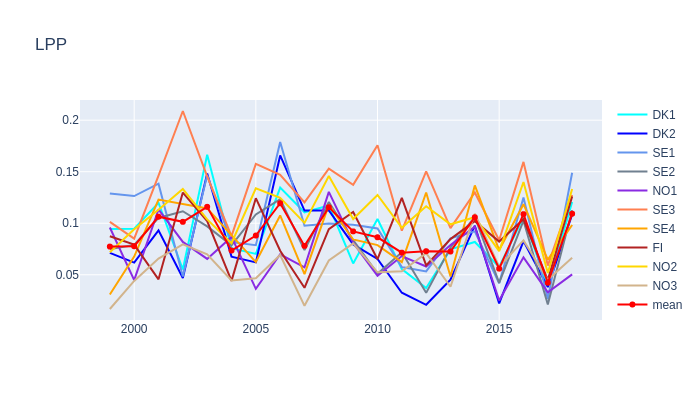

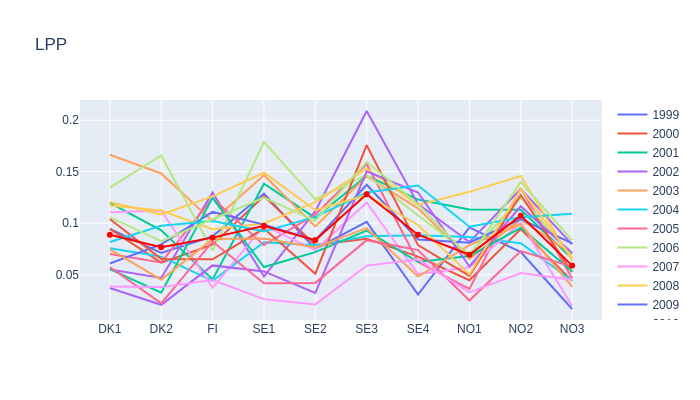

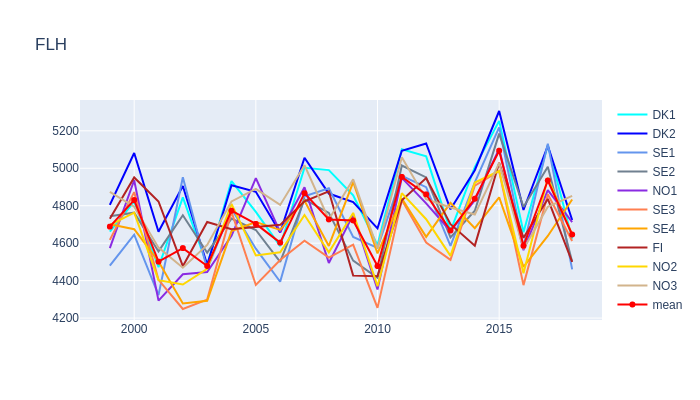

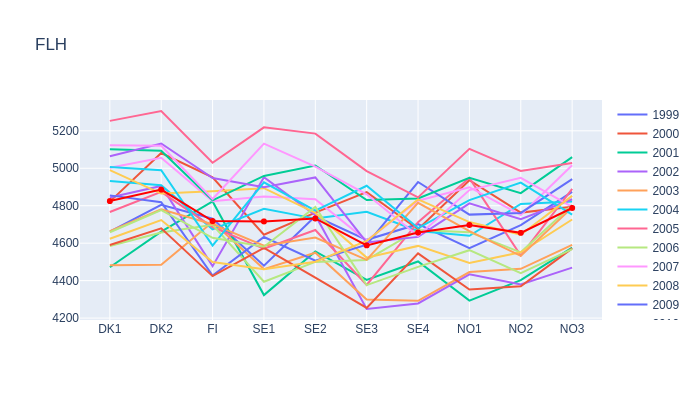

In [11]:
plot_indicators('LPP', 'historical')
plot_indicators('FLH', 'historical')
#plot_indicators('ZPD', 'historical',repryears = [2012,2000,2003])

In [12]:
#plot_indicators('LPP', 'future')
#plot_indicators('FLH', 'future')
#plot_indicators('ZPD', 'future')

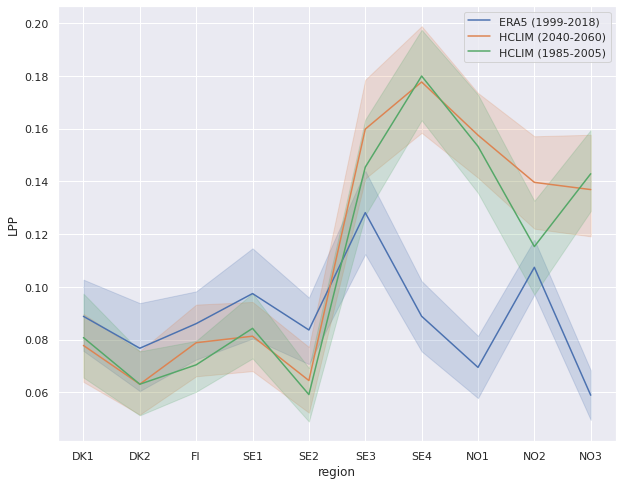

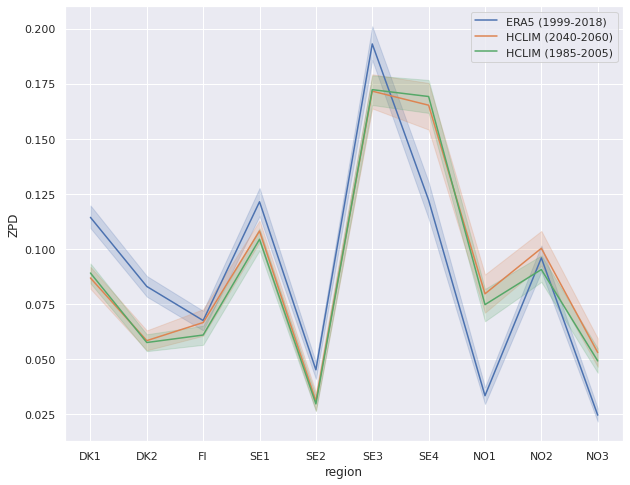

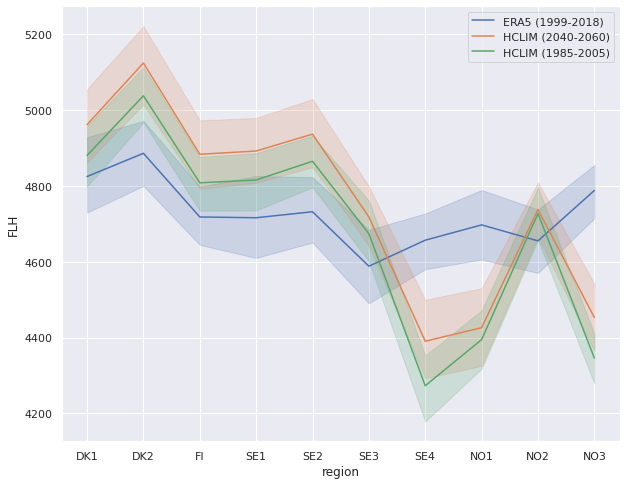

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
import pandas as pd
ERA5_DF   = h.load_object(h.inddatapath + "ERA5_DF_1999_2018.pkl")
HC_DF     = h.load_object(h.inddatapath + "HCLIM_DF_2040_2060.pkl")
HChist_DF = h.load_object(h.inddatapath + "HCLIM_hist_DF_1985_2005.pkl")

fig = plt.figure()
ax = sns.lineplot(data = ERA5_DF, x = 'region',y = 'LPP',
                              label="ERA5 (1999-2018)",)
ax = sns.lineplot(data = HC_DF, x = 'region', y = 'LPP',
                            label="HCLIM (2040-2060)")
ax = sns.lineplot(data = HChist_DF, x = 'region', y = 'LPP',
                            label="HCLIM (1985-2005)")
ax.legend()
fig.savefig(h.plotpath + "LPP_per_region.png", dpi =300)
fig.show()

fig = plt.figure()

ax = sns.lineplot(data = ERA5_DF, x = 'region', y = 'ZPD',
                             label="ERA5 (1999-2018)")
ax = sns.lineplot(data = HC_DF, x = 'region', y = 'ZPD',
                            label="HCLIM (2040-2060)")
ax = sns.lineplot(data = HChist_DF, x = 'region', y = 'ZPD',
                            label="HCLIM (1985-2005)")
ax.legend()
fig.savefig(h.plotpath + "ZPD_per_region.png", dpi =300)
fig.show()

fig = plt.figure()

ax = sns.lineplot(data = ERA5_DF, x = 'region', y = 'FLH',
                             label="ERA5 (1999-2018)")
ax = sns.lineplot(data = HC_DF, x = 'region', y = 'FLH',
                            label="HCLIM (2040-2060)")
ax = sns.lineplot(data = HChist_DF, x = 'region', y = 'FLH',
                            label="HCLIM (1985-2005)")
ax.legend()
fig.savefig(h.plotpath + "FLH_per_region.png", dpi =300)
fig.show()

In [14]:
ERA5_DF

year region       LPP          FLH       ZPD
0    1999    DK1  0.094521  4661.568831  0.113128
1    1999    DK2  0.071233  4804.517568  0.083219
2    1999     FI  0.087329  4730.375653    0.0629
3    1999    SE1  0.128767  4479.556996  0.137785
4    1999    SE2     0.075  4743.705697  0.047374
..    ...    ...       ...          ...       ...
195  2018    SE3  0.127397   4611.78863   0.18516
196  2018    SE4  0.098288  4833.628578  0.110731
197  2018    NO1  0.050342  4712.618938  0.022603
198  2018    NO2  0.133219  4645.092004  0.099201
199  2018    NO3  0.066438  4852.404025  0.026027

[200 rows x 5 columns]

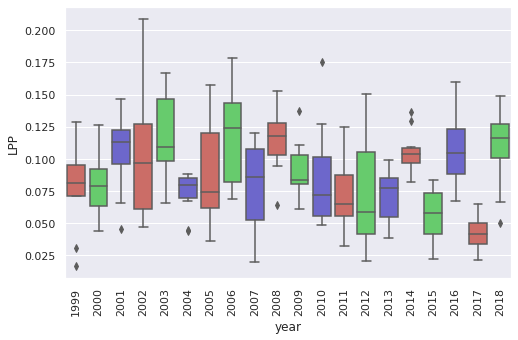

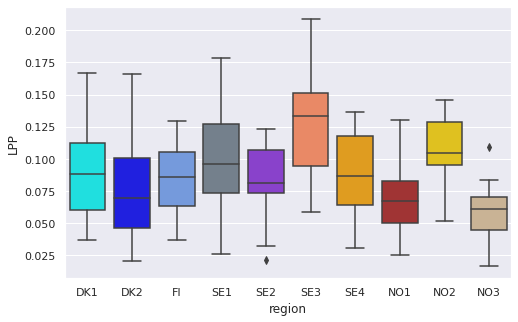

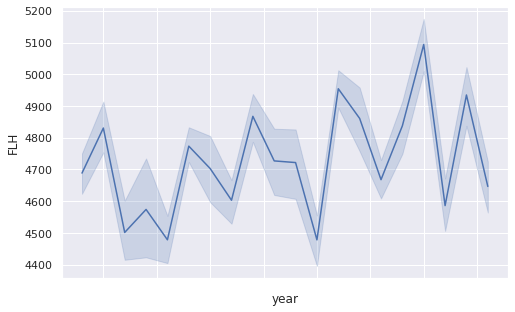

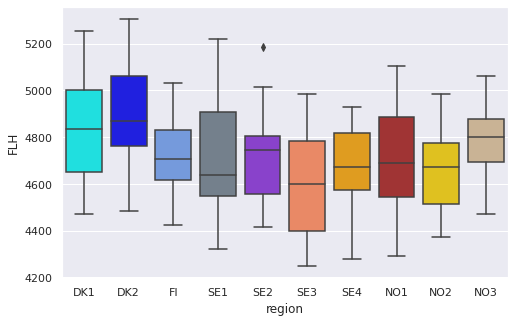

In [15]:
sns.set(rc={'figure.figsize':(8,5)})
#repryears = [1999,2000,2005,2007,2012,2003]
repryears = [2000,2012,2003]
pal_reg =list(h.reg_colors().values()) 
#pal = sns.color_palette("hls", 21)
pal = sns.color_palette("hls", len(repryears))
data = ERA5_DF[ERA5_DF["year"].isin(repryears)]
dataSE = data[data["region"].isin(['SE1','SE2','SE3','SE4'])]

fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'year',y = 'LPP', palette=pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.savefig(h.plotpath + "LPP_per_year_allregions_ERA5_boxplot.png", dpi =300)
fig.show()

fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'region',y = 'LPP',palette=pal_reg)
fig.savefig(h.plotpath + "LPP_per_region_allyears_ERA5_boxplot.png", dpi =300)
fig.show()

fig = plt.figure()
ax = sns.lineplot(data = ERA5_DF, x = 'year',y = 'FLH',palette=pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#fig.savefig(h.plotpath + "FLH_per_year_allregions_ERA5_boxplot.png", dpi =300)
fig.show()

fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'region',y = 'FLH',palette=pal_reg)
fig.savefig(h.plotpath + "FLH_per_region_allyears_ERA5_boxplot.png", dpi =300)
fig.show()


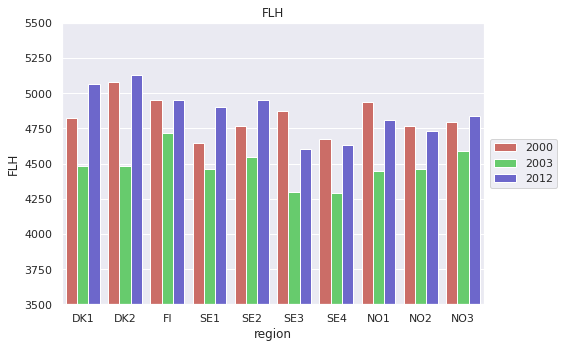

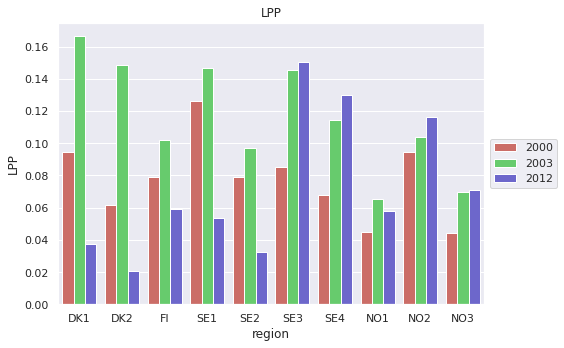

In [16]:

fig = plt.figure()
ax = sns.barplot(data = data, x = 'region', y = 'FLH', hue = 'year', palette=pal)
#[ax.axhline(y=i, linestyle='--',  c=c) for i,c in zip(data.groupby(['year']).mean()['FLH'].values,pal)]
plt.title('FLH')
plt.ylim([3500,5500])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
fig.savefig(h.plotpath + "FLH_per_region_ERA5_barplot.png", dpi =300)
fig.show()


fig = plt.figure()
ax = sns.barplot(data = data, x = 'region', y = 'LPP', hue = 'year',palette=pal)
#[ax.axhline(y=i, linestyle='--',  c=c) for i,c in zip(data.groupby(['year']).mean()['LPP'].values,pal)]
plt.title('LPP')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
fig.savefig(h.plotpath + "LPP_per_region_ERA5_barplot.png", dpi =300)
fig.show()



## Energy system plots

In the following the time series that have shown above are used as input into the energy system model. The model is a investment and dispatch optimization model with the objective to minimize the total annual energy costs.
The results are shown for a number of different years.

In [17]:
#from compare_energyyears import *
repryears = [2000,2012,2003]
x    = list(years)
plt.close('all')

GAMSregions = h.get_GAMSregions()
colors      = h.reg_colors()
elshare_df

dfs = {}
#for year in repryears:
for year in np.arange(1995,2019):
    filename    = "ERA5_lowFlex_H2store_{}_{}_200d10_3h".format(year,year)
    if os.path.exists(h.GAMSdatapath+filename+".pkl"):
        dfs[year]       = h.load_object(h.GAMSdatapath+filename+".pkl")
    else: print("Sorry, file {} does not exist".format(year))

NameError: name 'elshare_df' is not defined

In [ ]:
columns = ['year', 'technology', 'region', 'country', 'capacity']


capdf = pd.DataFrame(columns = ['year', 'region', 'country', 'technology', 'capacity'])
for y,i in dfs.items():
    for reg in GAMSregions.keys():
        cap    = i['o_capacity']
        cap    = cap[cap.value>0]
        cap.drop(cap[cap['tech']=='Tank_heat'].index, inplace =True)
        cap.drop(cap[cap['tech']=='bat_cap'].index, inplace=True)
        cap.drop(cap[cap['tech']=='bat'].index, inplace=True)
        cap.drop(cap[cap['tech']=='H2store'].index, inplace=True)
        cap.reset_index()
        year   = pd.Series(y,   index=range(cap.shape[0]))
        I_reg  = pd.Series(cap['I_reg'])
        tech   = pd.Series(cap['tech'])
        value  = pd.Series(cap['value'])
        frame = {'year':year, 'region':I_reg, 'country':I_reg, 'technology':tech, 'capacity':value}
        df_i  = pd.DataFrame(frame)
        capdf   = pd.concat([capdf, df_i],ignore_index=True)

capdf = capdf.astype({'region':'str'})
for k in ["SE1","SE2", "SE3","SE4"]:
    capdf.loc[capdf["country"] == k, "country"] = "SE"
for k in ["DK1","DK2"]:
    capdf.loc[capdf["country"] == k, "country"] = "DK"
for k in ["NO1", "NO2", "NO3"]:
    capdf.loc[capdf["country"] == k, "country"] = "NO"

capconsume= capdf[capdf["technology"].isin(["HP","EB","electrolyser"])]
capdf= capdf[~capdf["technology"].isin(["HP","EB","electrolyser"])]
#capdf = capdf[(capdf['technology']!='RO') & (capdf['technology']!='electrolyser') & (capdf['technology']!='RR')]

In [ ]:
capdf

## Plots Scandinavia 

In [ ]:
# Compute total capacity for Scandinavia
capScandsum = capdf.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()

ax = sns.barplot(data=capScandsum[capScandsum["year"].isin(repryears)], 
                 x='technology', y = 'sum', hue='year',palette=pal)
plt.title('Scandinavia')
fig.show()
plt.savefig(h.plotpath + "Scandinavia_installed_cap.png".format(reg), dpi =300)



In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
plt.figure()
#reorganize
totcap = capScandsum.pivot(index='year', columns='technology', values='sum')
# aggregate to one PC column
totcap['PV']= totcap[["PVPA1", "PVPB1", "PVR1"]].sum(axis=1)
# aggregate to  one Hydro column
totcap['Hydro']= totcap[["RR", "RO"]].sum(axis=1)
totcap = totcap[["Hydro", "WONA5", "WONA4", "WG_peak", "PV"] ]

#totcapScand = totcapScand.div(totcapScand.sum(1), axis=0)
ax=totcap.plot(kind='bar', stacked=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
plt.savefig(h.plotpath + "installedcap_compared.png".format(reg), dpi =300)
fig.show()

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
pal = sns.color_palette("hls", len(repryears))
capdf = capdf[capdf["year"].isin(repryears)]

for area in ["SE1", "SE2", "SE3", "SE4"]:
    plt.figure()
    capSE1 = capdf[capdf['region']==area]
    ax = sns.barplot(data=capSE1, x = 'technology', y='capacity', hue='year',palette=pal)
    plt.title(area)
    plt.savefig(h.plotpath + "{}_installed_cap.png".format(area), dpi =300)
    fig.show()


area = "SE"
plt.figure()
capSE    = capdf[capdf['country']==area]
capSEsum = capSE.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()
ax = sns.barplot(data=capSEsum, x='technology', y = 'sum', hue='year',palette=pal)
plt.title(area)
plt.savefig(h.plotpath + "{}_installed_cap.png".format(area), dpi =300)
fig.show()

area = "DK"
plt.figure()
capDK    = capdf[capdf['country']==area]
capDKsum = capDK.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()
ax = sns.barplot(data=capDKsum, x='technology', y = 'sum', hue='year',palette=pal)
plt.title(area)
plt.savefig(h.plotpath + "{}_installed_cap.png".format(area), dpi =300)
fig.show()


In [ ]:
print("total wind in Sweden")
for y in repryears:
    tot = capSEsum[(capSEsum['year']==y) & (capSEsum['technology']=='WONA4' )]['sum'].values  + \
            capSEsum[(capSEsum['year']==y) & (capSEsum['technology']=='WONA5' )]['sum'].values 
    print('Total wind cap in year {} : {}'.format(y,tot))

print("total wind in Scandinavia")
for y in  repryears:
    tot = capScandsum[(capScandsum['year']==y) & (capScandsum['technology']=='WONA4' )]['sum'].values  + \
            capScandsum[(capScandsum['year']==y) & (capScandsum['technology']=='WONA5' )]['sum'].values 
    print('Total wind cap in year {} : {}'.format(y,tot))
         

## Electricity costs per region 

In [ ]:
el_dict = dict()
# get the el cost
for key,v in dfs.items():
    el_dict[key]  = v['o_el_cost']

for reg in GAMSregions.keys():
    fig,ax = plt.subplots(figsize=(5,5))
    fig.suptitle("El cost duration curve " + reg)
    for year in repryears:
        el = el_dict[year]
        y = np.sort(el[el["I_reg"]==reg].value.values)[::-1]
        ax.plot(y[:100])
        ax.grid('True')
        ax.set_ylabel('Eur/MWh')
        ax.set_ylim([0,500])
        ax.legend(list(dfs.keys()),loc=1)
    fig.tight_layout()   
    plt.savefig(h.plotpath + "Eldurationcurve_{}.png".format(reg), dpi =300)

## Total system costs

In [ ]:
for y in repryears:
    print(y, ': total costs ', dfs[y]['o_cost_total']['value'].values)

In [ ]:
pal = sns.color_palette("hls", 3)

elshare_df = pd.DataFrame(columns = ['year', 'region', 'country', 'VREshare', 'windshare', 
                                    'windVREshare'])
for y,i in dfs.items():
    #or reg in GAMSregions.keys():
    VREshare     = i['o_VRE_share']
    windshare    = i['o_wind_share']
    year   = pd.Series(y, index=range(10))
    I_reg  = pd.Series(VREshare['I_reg'])
    windshare_value  = pd.Series(windshare['value'])
    VREshare_value   = pd.Series(VREshare['value'])
    windVREshare_val = windshare['value']/VREshare['value']
    frame = {'year':year, 'region':I_reg, 'country':I_reg, 'VREshare':VREshare_value, 'windshare':windshare_value, 'windVREshare':windVREshare_val}
    df_i  = pd.DataFrame(frame)
    elshare_df   = pd.concat([elshare_df, df_i],ignore_index=True)

elshare_df = elshare_df.astype({'region':'str'})
for k in ["SE1","SE2", "SE3","SE4"]:
    elshare_df.loc[elshare_df["country"] == k, "country"] = "SE"
for k in ["DK1","DK2"]:
    elshare_df.loc[elshare_df["country"] == k, "country"] = "DK"
for k in ["NO1", "NO2", "NO3"]:
    elshare_df.loc[elshare_df["country"] == k, "country"] = "NO"

In [ ]:
elshare_df=elshare_df[elshare_df["region"].isin(["SE1", "SE2", "SE3", "SE4"])]
x = sns.barplot(data=elshare_df, x="region", y="windshare", hue="year",palette=pal)
plt.figure()
x = sns.barplot(data=elshare_df, x="country", y="windshare", hue="year",palette=pal)

area = "SE"
plt.figure()
capSE    = capdf[capdf['country']==area]
capSEsum = capSE.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()
capSEsum = capSEsum[capSEsum['technology'].isin(["WONA4","WONA5"])].groupby('year').agg('sum')
capSEsum = capSEsum.reset_index()

ax = sns.barplot(data=capSEsum,x='technology',y='sum',hue='year',palette=pal)
plt.title(area)
fig.show()


In [ ]:
capSEsum.describe()

print(capSEsum)
capSEsum.std()/capSEsum.mean()

In [ ]:
elsharemean=elshare_df[elshare_df['country']=='SE'].groupby('year').mean()
elsharemean.std()/elsharemean.mean()

In [ ]:
capSEsum

In [ ]:
print(
    dfs[2000]['o_cost_total'],
    dfs[2003]['o_cost_total'],
    dfs[2012]['o_cost_total']
)


In [ ]:
dfs[2003].keys()
for year in repryears:
    print("year: ", year)
    o = dfs[year]['o_full_load_hours_regional']
    print(o[o['tech']=="WG_peak"])
 